In [8]:
import pandas as pd
df = pd.read_csv('BankChurners.csv')

In [9]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [10]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [12]:
df.drop(['Attrition_Flag'],axis=1,inplace=True)

In [13]:
df_ohe=pd.get_dummies(df)

In [35]:
df.nunique()

Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64

In [14]:
df_ohe.shape

(10127, 37)

# Standarize the data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
z_ohe_std = StandardScaler().fit_transform(df_ohe)

#Apply PCA

In [18]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(random_state = 42)

In [21]:
pca.fit(z_ohe_std)

PCA(random_state=42)

In [22]:
trans_data = pca.transform(z_ohe_std)

In [23]:
type(trans_data)

numpy.ndarray

In [24]:
df_trans = pd.DataFrame(trans_data)

In [25]:
df_trans.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.499179,-2.381809,-1.206188,-0.896605,1.532537,0.745319,2.989269,1.567728,0.589484,3.465206,...,0.004412,-0.388781,-0.127122,-0.004202,-5.918024e-16,6.597876e-17,-5.213281e-16,5.199381e-16,5.806605e-16,-2.142044e-16
1,-1.363516,0.652538,-1.519134,-1.460651,0.906348,3.581272,4.943736,8.011494,-0.185840,4.069410,...,0.758259,-0.107259,-0.518094,0.583235,-7.167025e-16,-6.070940e-16,-4.935726e-16,9.917829e-16,2.753491e-16,-7.195709e-17
2,0.943141,-2.251733,-2.375227,-2.286540,2.498943,1.357723,4.412302,7.613436,0.401673,3.873443,...,-0.194322,0.642761,-0.293466,0.481017,-2.201626e-15,1.214899e-16,-2.021390e-16,1.408117e-15,-8.071183e-16,4.831544e-16
3,-2.504815,0.208400,-2.349401,-1.385722,1.728369,3.194159,3.827787,2.319379,-0.817034,1.243960,...,0.419959,-0.118575,-0.312310,0.732271,-8.277248e-16,3.528712e-18,-1.159706e-15,5.754493e-16,1.088157e-16,-8.144187e-16
4,0.841201,-2.136735,-3.821835,-0.558848,2.910290,1.343300,5.605490,5.199045,0.719516,4.802453,...,-0.293968,0.777825,0.033271,0.208344,-2.090603e-15,3.990457e-16,-1.327501e-16,9.085162e-16,2.554896e-17,9.792853e-16


In [26]:
pca.components_[0]

array([-0.010814  ,  0.03690782, -0.00569975, -0.04968909, -0.01225662,
        0.01604026,  0.41301406, -0.03497158,  0.41606257,  0.00777227,
        0.10086953,  0.04431799, -0.00690585, -0.26887566, -0.35526348,
        0.35526348,  0.00437364, -0.00570635, -0.00411588,  0.00351391,
        0.0051142 ,  0.0019621 , -0.00407465,  0.00748856, -0.0308069 ,
        0.01759998,  0.01841902,  0.17270556, -0.04903117,  0.1392093 ,
        0.21338946, -0.28487812, -0.04623576, -0.25785715,  0.11387706,
        0.04730537,  0.22319999])

In [28]:
pca.explained_variance_*100

array([4.38319162e+02, 2.55089926e+02, 1.94779670e+02, 1.79297418e+02,
       1.74412964e+02, 1.51587781e+02, 1.39051364e+02, 1.34739998e+02,
       1.30010422e+02, 1.25563761e+02, 1.22568659e+02, 1.19566011e+02,
       1.18156764e+02, 1.14999144e+02, 1.12522193e+02, 1.10224717e+02,
       1.07141569e+02, 1.07066040e+02, 1.03674161e+02, 1.00679669e+02,
       1.00410513e+02, 9.78443166e+01, 9.74222657e+01, 9.02166405e+01,
       7.97646129e+01, 5.97956197e+01, 5.38940501e+01, 2.39311964e+01,
       2.09956482e+01, 2.03143179e+01, 1.63248224e+01, 8.64432128e-29,
       2.69117622e-29, 1.70264547e-29, 1.33128831e-29, 9.77487916e-30,
       3.63229219e-30])

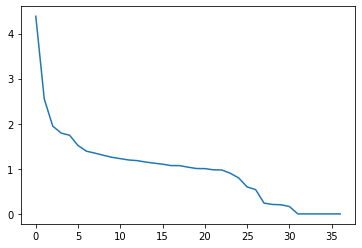

In [34]:
import matplotlib.pyplot as plt
plt.plot(list(range(df_ohe.shape[1])), pca.explained_variance_)


#automated way of pca component

In [30]:
pca1 = PCA(n_components =0.95,random_state =42)

In [31]:
pca1.fit(z_ohe_std)

PCA(n_components=0.95, random_state=42)

In [32]:
trans_data = pca1.transform(df_ohe)

C:\python3.10\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [33]:
trans_data.shape

(10127, 26)